Name: Rocio 

Labpartner(s): Edoardo

In [1]:
#import statements go here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.animation as ani
from pylab import rcParams
import cartopy.crs as ccrs


# Class 11.1

#### Announcements

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day 4/1 to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.
 
- Lab on Wed will be light on programming, as you have final research proposals this week. More on this on Wednesday, and you will have the oppertunity to work on them in the lab period then. See research proposal assignment on github

# Warmups 11.1

For warmups today you will share your plot animations.

# Lecture 11.1

### Agenda:
- Predator prey modeling. 

## Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

In [ ]:
#differential equations= the change of a slope depending on all the variables involved. 

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

In [ ]:
#x is the number of prey (for example, rabbits);
#y is the number of some predator (for example, foxes);
#α, β, γ, δ are positive real parameters describing the interaction of the two species.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

In [ ]:
# βxy = the relationships between the predator and prey which will result in the decrease of the prey. More predators = more predation = a higher βxy relationship.

In [ ]:
# 𝛿𝑥𝑦 = the imperfect relationship between the predator and the prey taking into account, what doesnt get eaten due to washoff, weather, biology, etc.

In [ ]:
#If dx/dt is the population growth rate(without predators in the picture), 
#then while x increases the entire population growth rate would then increase without any predators to control.  

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [9]:
#define the time stepping scheme - Euler forward or "shooting" method

#Euler step = Given any slope(t) according to the variables/relationship you them "shoot" that in time.  
#similar to x = mx + b  with x(in this case being time) bring the increment of dt and f(u) being the slope(m)where you started/left off.

#doesn't work super well. 

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [10]:
# define the function that represents the Lotka-Volterra equations
# u is the y state of the system.(at any given time thats the population)
# u = [x,y], one array with both the pred and prey variables. 
def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [11]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment (how far in the future you will go)
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations : (initial conditions that tell the programming where to start)
x0 = 10.  #initial prey amount. 
y0 = 2.    #initial predator amount. 
t0 = 0.     #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))   #2 dimensions is what that stands for: why? X,Y plane and put pred and prey together

# imput initial conditions
u_euler[0] = np.array([x0, y0])

    

In [12]:
u_euler   #with initial value of prey being that 10 and initial value of pred being that 2

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [13]:
#use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [14]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [15]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)   #this will solely give us the time 
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

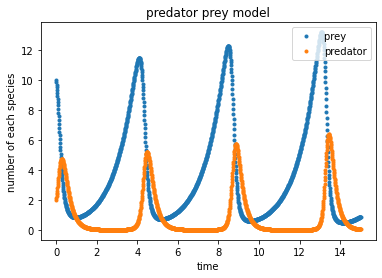

In [16]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [ ]:
#interpretation: prey decreases due to the Bxy (predation) or basically the predator doing it's thing. As the prey is going down the predator continues to grow. 
#as time continues there will be a decrease of both species due to that moment that
#they run out of food. Once X gets really small then Y also decreases. 

In [ ]:
#the peaks continue to get higher and this is based off of the euler method and its faultiness.  

In [19]:
# second plot- changing the initial condition. 



T  = 15.0                           # final time
dt = 0.01                           # set time-increment (how far in the future you will go)
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations : (initial conditions that tell the programming where to start)
x0 = 35.  #initial prey amount. 
y0 = 3.    #initial predator amount. 
t0 = 0.     #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))   #2 dimensions is what that stands for: why? X,Y plane and put pred and prey together

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [20]:
#use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [21]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)   #this will solely give us the time 
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

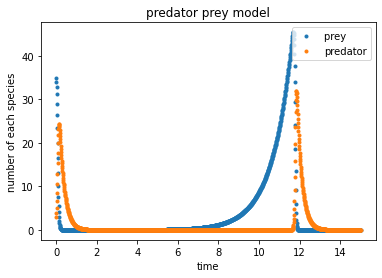

In [22]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [ ]:
#interpretation: The predators seem to be stagnant for a bit of time- and then catching up. 

In [ ]:
#Attempt #3

In [23]:
# second plot- changing the initial condition. 



T  = 15.0                           # final time
dt = 0.01                           # set time-increment (how far in the future you will go)
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations : (initial conditions that tell the programming where to start)
x0 = 5.  #initial prey amount. 
y0 = 5.    #initial predator amount. 
t0 = 0.     #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))   #2 dimensions is what that stands for: why? X,Y plane and put pred and prey together

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [24]:
#use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [25]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)   #this will solely give us the time 
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

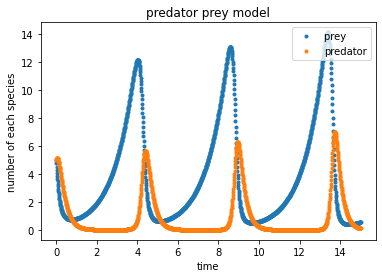

In [26]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [ ]:
#interpretation: Very similar to the initial one. However, this time around we see botht the pred and prey starting off at the same mark. 

In [ ]:
#Attempt 4, messing with the prey growth rate. 

In [27]:
# set the initial parameters
alpha = 2.
beta = 1.2
gamma = 4.
delta = 1.

In [28]:
# second plot- changing the initial condition. 



T  = 15.0                           # final time
dt = 0.01                           # set time-increment (how far in the future you will go)
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations : (initial conditions that tell the programming where to start)
x0 = 5.  #initial prey amount. 
y0 = 5.    #initial predator amount. 
t0 = 0.     #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))   #2 dimensions is what that stands for: why? X,Y plane and put pred and prey together

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [29]:
#use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [30]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)   #this will solely give us the time 
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

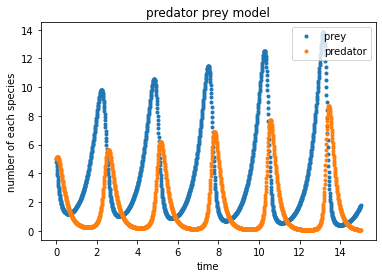

In [31]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [32]:
#interpretation: the growth rate (alpha) changed which affected the time and variables.

## System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

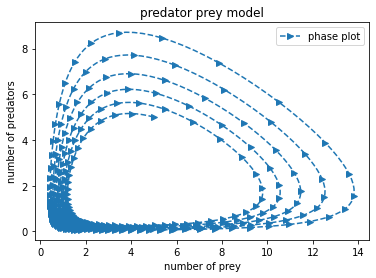

In [33]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
#similarity in plots and variables. 

# Lab 11.1

## E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

In [42]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [43]:
# first plot, increasing dt



T  = 15.0                           # final time
dt = 0.1                          # set time-increment (how far in the future you will go)
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations : (initial conditions that tell the programming where to start)
x0 = 5.  #initial prey amount. 
y0 = 5.    #initial predator amount. 
t0 = 0.     #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))   #2 dimensions is what that stands for: why? X,Y plane and put pred and prey together

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [44]:
#use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [45]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)   #this will solely give us the time 
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

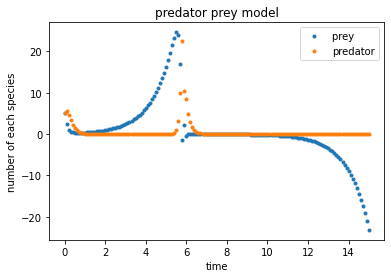

In [46]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [47]:
# so here, I increased the dt, which is giving me a weird flat lining of the predator population. So by increasing the 
#set time-incrementfor how this relationship will look in the future, it reflects predators dying out compltely and they prey eventually 
#going into the negatives?

In [48]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [49]:
# second plot- decreasing dt 



T  = 15.0                           # final time
dt = 0.001                          # set time-increment (how far in the future you will go)
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations : (initial conditions that tell the programming where to start)
x0 = 5.  #initial prey amount. 
y0 = 5.    #initial predator amount. 
t0 = 0.     #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))   #2 dimensions is what that stands for: why? X,Y plane and put pred and prey together

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [50]:
#use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [51]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)   #this will solely give us the time 
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

Text(0.5, 1.0, 'predator prey model')

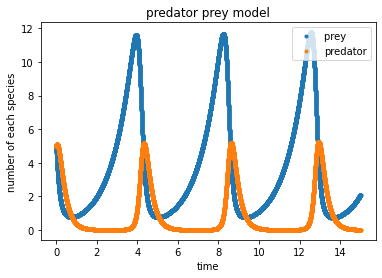

In [52]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [ ]:
#Interpretation: Here is appears that decreasing dt bolded my plot lines but reflects a consistent predatory/prey relationship
#So with a smaller time in the future the more accurate a relationship will reflect is what i'm imagining is happening here. 

## E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot. What happens if you start at the steady state? What happens if you start near the steady state?

In [35]:
#Theres usually 2, one is 0=everyone is dead and the other is usually in themiddle where relationship is constant. 

In [53]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [54]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

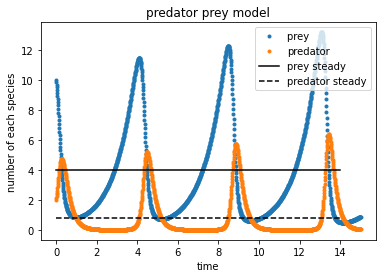

In [55]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "prey steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "predator steady",color="k",linestyle="--")

plt.legend(loc='upper right')


#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [ ]:
#Interpretation: The plot runs the steady line through the preys steady number of 4 while running the dotted predator steady line
#at a number of 1.5. 

Text(0.5, 1.0, 'predator prey model')

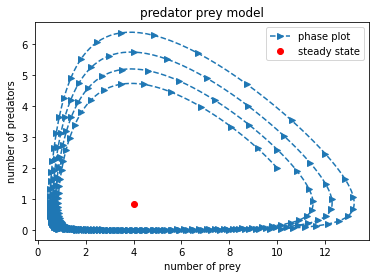

In [56]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
#Interpretation: Here, the steady state of the prey is still seen as a 4 however, the predator is listed as a .9. 

In [61]:
T  = 15.0                           
dt = 0.01                          
N  = int(T/dt) + 1 

x0 = 4 
y0 = .9 
t0 = 0

In [62]:
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'Stable coexistence predator prey model')

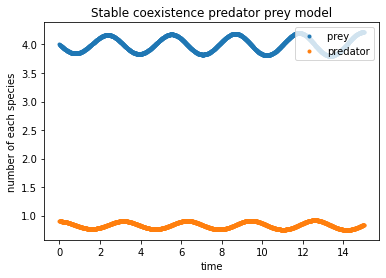

In [63]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("time")
plt.ylabel("number of each species")
plt.title("Stable coexistence predator prey model")

In [ ]:
#interesting! If I had wanted to make it a fun relationship I wouldn't have achieved it. So here we see how stable each variable is 
#independent of itself. 

## Another time stepping method with higher order of accuracy

## E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [64]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [ ]:
#which creates a more accurate algorythm. 

In [67]:
T  = 15.0                           
dt = 0.01                     
N  = int(T/dt) + 1                  

x0 = 4.   #Here may have been my issues with that dquiggly line up there. 
y0 = .09
t0 = 0.

u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

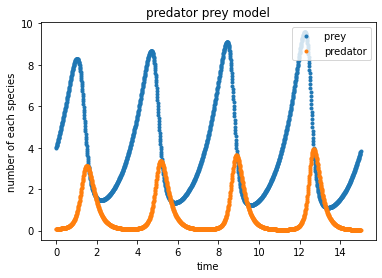

In [68]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

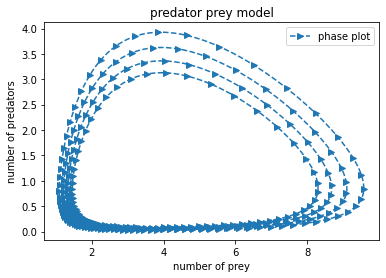

In [69]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')

plt.legend(loc='upper right')
plt.xlabel("number of prey")
plt.ylabel("number of predators")

plt.title("predator prey model")

In [ ]:
#The answers kind of differ? My first model looks fairly different under this Runge Kutta method, however my second plot looks fairly  similar. 

## E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [76]:
# set the initial parameters, < delta to .5
alpha = 1.
beta = 1.2
gamma = 4.
delta = .5

# decreasing the dt, because it seems to have a better outcome than increasing the time.
T  = 15.0  
dt = 0.055                    
N  = int(T/dt) + 1           

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = .09 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

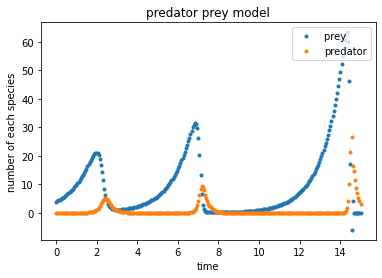

In [77]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [80]:
# set the initial parameters, < delta to .5
alpha = .5
beta = 1.2
gamma = 4.
delta = .5

# decreasing the dt, because it seems to have a better outcome than increasing the time.
T  = 15.0  
dt = 0.055                    
N  = int(T/dt) + 1           

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = .09 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

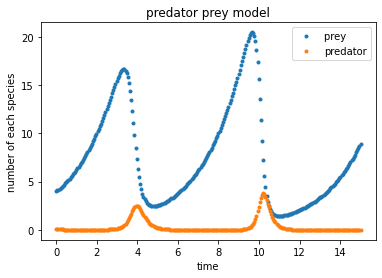

In [81]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [82]:
# set the initial parameters, < delta to .5
alpha = 1.
beta = 2.
gamma = 4.
delta = .5

# decreasing the dt, because it seems to have a better outcome than increasing the time.
T  = 15.0  
dt = 0.055                    
N  = int(T/dt) + 1           

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = .09 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

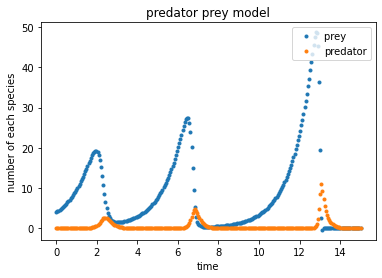

In [83]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [86]:
# set the initial parameters, < delta to .5
alpha = 1.
beta = 1.2
gamma = .001
delta = .5

# decreasing the dt, because it seems to have a better outcome than increasing the time.
T  = 15.0  
dt = 0.055                    
N  = int(T/dt) + 1           

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = .09 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

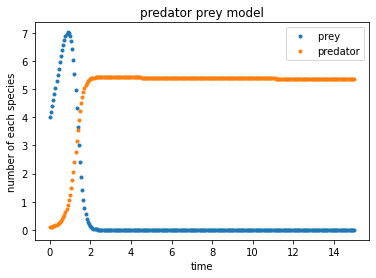

In [87]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [88]:
# set the initial parameters, < delta to .5
alpha = 1.
beta = 1.2
gamma = 4.
delta = 5.

# decreasing the dt, because it seems to have a better outcome than increasing the time.
T  = 15.0  
dt = 0.055                    
N  = int(T/dt) + 1           

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = .09 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) 
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

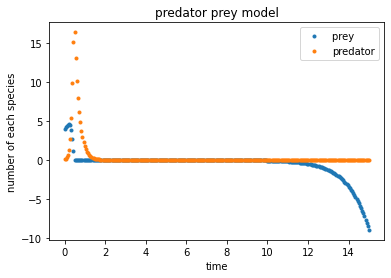

In [89]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [ ]:
alpha = #this one at zero = death. Upong lowering this # it looks like the prey were able to get eaten less by the prey, by default the predator dies out. 

beta = # I increased the beta and saw that the one peak lowered, however the final peak wqas much higher so I'm not certain what this one changes. 

gamma = # By lowering this number, I saw the predators and prey relationship meet, predate/die and then independently survive and continue on their way, most likely surviving off of some other food source

    
delta =  #By increasing this number we got a CRAZY inverse relationship!Here both start at the same population and then somehow the predatorsshoot up in quantity by literally eating all of the 
#prey. This is hardly sustainble which eventually kills off the predator. 



## E.5 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example

In [ ]:
-